<a href="https://colab.research.google.com/github/FRANMUMADE/ENTREGAS_FCOTREJO_MUMADE_2022/blob/main/16_nov_Razonamiento_Aproximado_Naive_Bayes_Fran_para_entregar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUMNO: FRANCISCO JAVIER TREJO RODRÍGUEZ

Disculpad por la posible falta de tildes o uso indebido de mayúsculas.

16/11/2022_NAIVE BAYES.
Vamos a operar de diferentes maneras con los préstamos de nuestro banco, en concreto vamos a intentar crear clasificadores para que dadas unas variables nos den la probabilidad o el rating de darle un préstamo a un cliente

## Carga de Datos

Mismo procedimiento que hicimos en consultas (no creación de BD).

In [ ]:
!gdown --id 1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU
To: /content/data_berka.db
100% 70.2M/70.2M [00:00<00:00, 162MB/s]


1. Cargamos la extensión sql

In [ ]:
%load_ext sql

2. Nos conectamos con la base de datos; es nuestro mecanismo de conexión.

In [ ]:
%sql sqlite:///data_berka.db

'Connected: @data_berka.db'

> Datos de préstamos ya finalizados con su estado final, incluyendo datos del distrito, etc.

¿Cuántos préstamos hay por cada estado del préstamos? el otro día lo hicimos en el cuaderno de consultas.
seleccionamos status y que lo cuente, from de prestamos (loan) el groupby debe llevar la que hemos seleccionado y luego los ordeno.

In [ ]:
%%sql
SELECT status, count(*) as total
FROM LOAN
GROUP BY status
ORDER BY total DESC

 * sqlite:///data_berka.db
Done.


status,total
C,403
A,203
D,45
B,31


Vamos a empezar obteniendo los datos de los préstamos ya finalizados. Van a ser nuestros datos de entrenamiento (Train). Por lo que seleccionaremos únicamente aquellos préstamos en status 'A' o 'B'. dicotomía.

Con una sentencia CASE vamos a poner los prestamos finalizados bien a 1 y los que no finalizaron bien a 0. 

Sintaxis de uso de [INNER JOIN](https://www.sqlitetutorial.net/sqlite-inner-join/) para establecer joins entre tablas

el where es el filtro;
el substr de cero a tres años;
creamos una variable llamada loans_train;
nuestro inner join es la intersección y se suele hacer dentro del from;
case forma como establecer diferentes formas de salida y luego le ponemos un END y un nombre. Podríamos poner un else que es cuando no se cumpla alguno de los campos darle un valor. 

In [ ]:
%%sql loans_train << SELECT substr(l.date,0,3) year, amount, duration, payments, A11, A13,
  CASE status WHEN 'A' THEN 1
              WHEN 'B' THEN 0
  END label
  FROM LOAN l, ACCOUNT a INNER JOIN DISTRICT d on a.district_id = d.A1 
  WHERE l.account_id = a.account_id and l.status in ("A", "B")

 * sqlite:///data_berka.db
Done.
Returning data to local variable loans_train


3. Obtenemos el DataFrame

In [ ]:
df_train = loans_train.DataFrame()
df_train.head()

,year,amount,duration,payments,A11,A13,label
0,93,96396,12,8033,9650,3.67,0
1,93,165960,36,4610,8369,2.31,1
2,93,127080,60,2118,8390,2.89,1
3,93,105804,36,2939,8754,4.31,1
4,93,274740,60,4579,12541,0.43,1


Utilizando el comando SHAPE me dice el número de filas y variables del dataframe.

In [ ]:
df_train.shape

(234, 7)

Para la parte de Test vamos a extraer de la base de datos prestamos que estan en ejecución ('status con C y D ) con los mismos campos que la consulta anterior.

In [ ]:
%%sql loans_test << SELECT substr(l.date,0,3) year, amount, duration, payments, A11, A13, 
  CASE status WHEN 'C' THEN 1
              WHEN 'D' THEN 0
  END label
  FROM LOAN l, ACCOUNT a INNER JOIN DISTRICT d on a.district_id = d.A1 
  WHERE l.account_id = a.account_id and l.status in ("C", "D")

 * sqlite:///data_berka.db
Done.
Returning data to local variable loans_test


creo su dataframe.

In [ ]:
df_test = loans_test.DataFrame()
df_test.head()

,year,amount,duration,payments,A11,A13,label
0,94,253200,60,4220,9893,4.72,1
1,94,300660,60,5011,9317,7.07,1
2,94,167100,60,2785,8544,1.86,1
3,94,149340,60,2489,8254,3.76,1
4,94,89040,60,1484,8909,5.56,1


compruebo filas y variables.

In [ ]:
df_test.shape

(448, 7)

Ejercicio: Añadir la edad del cliente propietario de la cuenta del prestamo. HACER EN CASA, LO INCLUYO EN UN NUEVO DATAFRAME DE TEST Y DE ENTRENAMIENTO.


In [ ]:
%%sql
SELECT birth_number
FROM CLIENT
LIMIT 5

 * sqlite:///data_berka.db
Done.


birth_number
706213
450204
406009
561201
605703


In [ ]:
  %%sql loans_test2 << SELECT substr(l.date,0,3) year, amount, duration, payments, A11, A13, birth_number,
  CASE status WHEN 'C' THEN 1
              WHEN 'D' THEN 0
  END label
  FROM LOAN l, CLIENT, ACCOUNT a INNER JOIN DISTRICT d on a.district_id = d.A1 
  WHERE l.account_id = a.account_id and l.status in ("C", "D")


 * sqlite:///data_berka.db
Done.
Returning data to local variable loans_test2


In [ ]:
df_test2 = loans_test2.DataFrame()
df_test2.head()

,year,amount,duration,payments,A11,A13,birth_number,label
0,94,253200,60,4220,9893,4.72,706213,1
1,94,253200,60,4220,9893,4.72,450204,1
2,94,253200,60,4220,9893,4.72,406009,1
3,94,253200,60,4220,9893,4.72,561201,1
4,94,253200,60,4220,9893,4.72,605703,1


In [ ]:
df_test2.shape

(2405312, 8)

In [ ]:
%%sql loans_train2 << SELECT substr(l.date,0,3) year, amount, duration, payments, A11, A13, birth_number, 
  CASE status WHEN 'A' THEN 1
              WHEN 'B' THEN 0
  END label
  FROM LOAN l, CLIENT, ACCOUNT a INNER JOIN DISTRICT d on a.district_id = d.A1 
  WHERE l.account_id = a.account_id and l.status in ("A", "B")

 * sqlite:///data_berka.db
Done.
Returning data to local variable loans_train2


In [ ]:
df_train2 = loans_train2.DataFrame()
df_train2.head()

,year,amount,duration,payments,A11,A13,birth_number,label
0,93,96396,12,8033,9650,3.67,706213,0
1,93,96396,12,8033,9650,3.67,450204,0
2,93,96396,12,8033,9650,3.67,406009,0
3,93,96396,12,8033,9650,3.67,561201,0
4,93,96396,12,8033,9650,3.67,605703,0


In [ ]:
df_train2.shape

(1256346, 8)

4. División de los datos en entrenamiento y test

features es una variable tipo lista que almacena los nombres de las características que sirven como entrada.

In [ ]:
features = ["year", "amount", "duration", "payments","A11", "A13"]

Ponemos los datos de préstamos ya finalizados en train (entrenamiento y creación del modelo); y en test los datos de préstamos en vigor o ejecución (evaluación del modelo).

In [ ]:
X_train = df_train[features]
y_train = df_train["label"]

X_test = df_test[features]
y_test = df_test["label"]


5. Normalizarlos puede ser una buena medida para obtener mejores resultados.
Para ello vamos a utilizar el [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

El centrado y el escalado se realizan de forma independiente en cada característica, calculando las estadísticas pertinentes en las muestras del **conjunto de entrenamiento**. La media y la desviación estándar se almacenan para utilizarlas en datos posteriores mediante una **transformación**.

Mas información sobre normalización en el siguiente [enlace](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)


Sabemos que la normalización o tipificación nos quita el efecto escala, de forma que puede mejorar el modelo y trabajar con mayor coherencia.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calculo de los factores de centrado y escalado
scaler.fit(X_train) 
# transformación
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ESTO LO ESTA ESTANDARIZANDO PARA QUE TODO SE NORMALICE:


Aplicamos un modelo [NaiveBayes](https://scikit-learn.org/stable/modules/naive_bayes.html?highlight=naive+bayes) para construir un clasificador de préstamos

Hay otra serie de modelos que pueden mejorar o empeorar los resultados. En el enlace nos salen diferentes como: multinomial, Bernoulli, Complement.

In [ ]:
from sklearn.naive_bayes import GaussianNB #, MultinomialNB, BernoulliNB, ComplementNB

gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Número de préstamos clasificados erroneamente %d de un total de  %d"  % (X_test.shape[0], (y_test != y_pred).sum()))


Número de préstamos clasificados erroneamente 448 de un total de  123


Para ver que resultados tenemos sobre la colección de `test` utilizamos en primer lugar el informe de los resultados [`classification report`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

Con el siguiente comando mide todas las medidas, para ver si nos hemos equivocado o hemos acertado.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.20      0.60      0.31        45
           1       0.94      0.74      0.83       403

    accuracy                           0.73       448
   macro avg       0.57      0.67      0.57       448
weighted avg       0.87      0.73      0.78       448



Y la [matriz de confusión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

De forma visual el acierto o error mejora su apreciación a través de la matriz de confusión. Comparando nuestra predicción con la realidad. En la Diagonal Principal se encuentran los aciertos, y en la inversa los errores. De forma que la ponderación sobre el total nos dará el % de acierto o error (105+18)/448= 27.45% error; (27+298)/448= 72.54% acierto. 

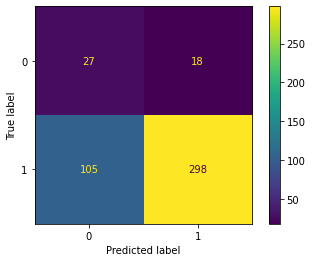

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

**Ejercicios**

Plantear el clasificador de préstamos añadiendo datos de otras tablas de la base de datos, u otros campos de las mismas tablas (edad del cliente, etc).

Otras transformaciones: [Discretización](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-discretization) y utilización de otros clasificadores NB 

4.1. Creo variable lista con la fecha de nacimiento que incluí en la parte inicial.

In [ ]:
features2 = ["year", "amount", "duration", "payments","A11", "A13", "birth_number"]

Creación del modelo train (conjunto de entrenamiento) y test (conjunto de evaluación).

In [ ]:
X_train2 = df_train2[features2]
y_train2 = df_train2["label"]

X_test2 = df_test2[features2]
y_test2 = df_test2["label"]

5.1. Estandarizamos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calculo de los factores de centrado y escalado
scaler.fit(X_train2) 
# transformación
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB #, MultinomialNB, BernoulliNB, ComplementNB

gnb = GaussianNB()
clf = gnb.fit(X_train2, y_train2)
y_pred = clf.predict(X_test2)
print("Número de préstamos clasificados erroneamente %d de un total de  %d"  % (X_test2.shape[0], (y_test2 != y_pred).sum()))

Número de préstamos clasificados erroneamente 2405312 de un total de  660387


al incorporar la fecha nacimiento, no creo que esté saliendo algo lógico, preguntar a Francisco en tutoría.
Praticar otro modelo con otro join y variables.

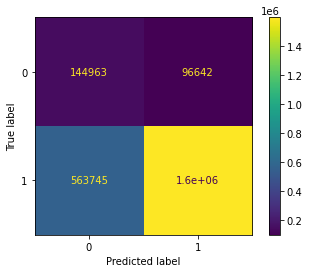

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test2, y_pred, labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()